# STATISTICAL ANALYSIS PPUC

In this part, we would like test our hypothersis by answering to some general statistical questions. 
####  Null Hyothesis(Ho) : The price of the used car is not correlated to car mileage, car age, car model and car transmission 

####  Alternative hypothesis (H1): There is  a relationship among them 

How are we going to test this hypothesis:

By intuition and by the common sense, we reject the null hypothesis by interpreting the p and t values

The main questions related to that hypothesis testing are going to be: 
    1) Is there anay relatioship (association) between those listed features and car price?
    2) If there exists how strong is that relationship?
    3) which feature most insfluences the car price?
    4) can car price be pridected trhoughout those features? if so what's will be the best model?
    
    To answer to these question we are going to use STATSMODEL AND SCIKIT-LEARN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')
import seaborn as sb
import os
from shutil import copyfile
from datetime import datetime
import sklearn
import seaborn as sns

In [3]:
# UPLOADING THE DATA SET

Data_Frame = pd.read_csv('C:/Users/emmat/Desktop/database/DATA.csv',  encoding='cp1252', index_col= 0)
Data_Frame.head(5)

,car_id,car_make,car_model,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_vendor,car_location,car_engine
0,73531922,Toyota,Corolla-LE,2015,23036,13298,Automatic,FWD,Chantilly,VA 20151,1.8 4 Cylinder Sequential-Port F.I.
1,72354903,Jeep,Wrangler-Unlimted-Sahara,2012,73619,26995,AUTOMATIC,4WD,Baltimore,MD 21215,3.6L 6 CYL. GAS
2,73704666,Honda,Civic-LX,2014,27784,14097,Automatic,FWD,Ellicott City,MD 21043,1.80L I4
3,73566743,Jeep,Grand-Cherokee-Limited,2014,36636,27899,8-Speed Automatic,4WD,Palmyra,PA 17078,3.6L V6 Flex Fuel 24V VVT
4,73745994,Hyundai,Santa-Fe-Sport-24L,2013,48568,18981,A,AWD,Doylestown,PA 18902,2.40L I4


In [5]:
Data_Frame.shape

(21594, 11)

###     A quick remark: 

###    On the car_transmission valiable, the attribute "automatic" is materialized by three different symbols: 'Automatic', 'AUTOMATIC', 'A'. First let's uniformize that variale by a unique attribute "Automatic"

In [6]:
# this dictionary transform all the symbols attributed to car_transmission to a unique one 

some_changes = {"car_transmission":   
                {"AUTO":"Automatic" , "Automatic CVT":"Automatic",
"AUTOMATIC": "Automatic","A": "Automatic" }}

Data_Frame.replace(some_changes, inplace=True)
Data_Frame.head(3)

,car_id,car_make,car_model,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_vendor,car_location,car_engine
0,73531922,Toyota,Corolla-LE,2015,23036,13298,Automatic,FWD,Chantilly,VA 20151,1.8 4 Cylinder Sequential-Port F.I.
1,72354903,Jeep,Wrangler-Unlimted-Sahara,2012,73619,26995,Automatic,4WD,Baltimore,MD 21215,3.6L 6 CYL. GAS
2,73704666,Honda,Civic-LX,2014,27784,14097,Automatic,FWD,Ellicott City,MD 21043,1.80L I4


###  Now let's check if our new data set is perfectly cleaned (has no missing values and has no duplicates)¶

In [7]:
# checking duplicates rows

Data_Frame.duplicated('car_id').sum()

2

###  It appears that we have 2 duplicated rows. Let's take a look at those 2 duplicated rows

In [8]:
Data_Frame [Data_Frame.duplicated(['car_id'], keep=False)]

,car_id,car_make,car_model,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_vendor,car_location,car_engine
3894,701805568,Ford,Escape,2016,33633,17293,6-Speed Automatic,4WD,Temple Hills,Temple Hills,NaN
4060,701805568,Ford,Escape,2016,33633,17790,6-Speed Automatic,4WD,Temple Hills,Temple Hills,NaN
4081,705830314,Chevrolet,Impala,2001,117241,24500,Automatic,FWD,Marlow Heights,Marlow Heights,NaN
4395,705830314,Chevrolet,Impala,2001,117241,24516,Automatic,FWD,Marlow Heights,Marlow Heights,NaN


###   We can get rid of those duplicated rows. They have different prices and we do not know which price is right

In [9]:
Data_Frame = Data_Frame.drop_duplicates(subset=['car_id'], keep= False)
Data_Frame .shape

(21590, 11)

In [10]:
## checking if still any duplicated values

Data_Frame.duplicated('car_id').sum() 

# the same can be done by the following code : 
# Data_Frame[Data_Frame.isnull().any(axis=1)]

0

In [11]:
# In more detail, let see how many null values we get

Data_Frame.isnull().sum()

car_id                 0
car_make               0
car_model              0
car_year               0
car_mileage            0
car_price              0
car_transmission     335
car_driveTrain       335
car_vendor             0
car_location           0
car_engine          4882
dtype: int64

###  car_transmission , car_driveTrain, car_engine columns still have some missing values. we can easily cleaned them using the fillna method

In [12]:
# filling missing values in car_driveTrain and car_transmission

Data_Frame['car_driveTrain'].fillna('FWD', inplace=True)
Data_Frame['car_transmission'].fillna('Automatic', inplace=True)
Data_Frame.head(5)

,car_id,car_make,car_model,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_vendor,car_location,car_engine
0,73531922,Toyota,Corolla-LE,2015,23036,13298,Automatic,FWD,Chantilly,VA 20151,1.8 4 Cylinder Sequential-Port F.I.
1,72354903,Jeep,Wrangler-Unlimted-Sahara,2012,73619,26995,Automatic,4WD,Baltimore,MD 21215,3.6L 6 CYL. GAS
2,73704666,Honda,Civic-LX,2014,27784,14097,Automatic,FWD,Ellicott City,MD 21043,1.80L I4
3,73566743,Jeep,Grand-Cherokee-Limited,2014,36636,27899,8-Speed Automatic,4WD,Palmyra,PA 17078,3.6L V6 Flex Fuel 24V VVT
4,73745994,Hyundai,Santa-Fe-Sport-24L,2013,48568,18981,Automatic,AWD,Doylestown,PA 18902,2.40L I4


## we can drop for now the car_engine column. we do not need it now

In [39]:
Data_Frame = Data_Frame.drop(['car_engine'], axis = 1)
Data_Frame.head(5)

,car_id,car_make,car_model,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_vendor,car_location
0,73531922,Toyota,Corolla-LE,2015,23036,13298,Automatic,FWD,Chantilly,VA 20151
1,72354903,Jeep,Wrangler-Unlimted-Sahara,2012,73619,26995,Automatic,4WD,Baltimore,MD 21215
2,73704666,Honda,Civic-LX,2014,27784,14097,Automatic,FWD,Ellicott City,MD 21043
3,73566743,Jeep,Grand-Cherokee-Limited,2014,36636,27899,8-Speed Automatic,4WD,Palmyra,PA 17078
4,73745994,Hyundai,Santa-Fe-Sport-24L,2013,48568,18981,Automatic,AWD,Doylestown,PA 18902


## Let's take a looke at the shape of the Dataframe

In [13]:
print('total number of rows', Data_Frame .shape[0])
print ('total number of columns is now',Data_Frame .shape[1] )

total number of rows 21590
total number of columns is now 11


## We can now check if we have got rid all of the missing values completely

In [14]:
print ("The total number of missing values is:", Data_Frame.car_transmission.isnull().sum())

The total number of missing values is: 0


##  NOW THAT THE DATA SET IS TOTALY CLEANED, LET'S START STATISCAL ANALYSIS

## Any outliers? Let's look for maximum and minimums on car Price¶

In [15]:
Data_Frame [['car_year', 'car_make','car_model', 'car_mileage','car_price']]\
.sort_values(by='car_price',ascending=True).head(5)

,car_year,car_make,car_model,car_mileage,car_price
1149,2000,Honda,Accord,220000,500
4459,2005,Pontiac,Sunfire,168781,700
7647,1996,Honda,Accord-LX,263377,999
9255,2000,Nissan,Maxima-GXE,287944,999
11453,1999,GMC,S-15-Jimmy-SL,179683,999


### The above table shows that the minimum value on the car price is 500 dolars. the car that is sold at that price a Honda Accord, year 2000, with the total mileage of 220000. While maximum value of the same kind of car is sold at 27,000 dolars (see table below). Thus the price of 500 is about right and cannot be considered as outlier.

In [16]:
Data_Frame.loc[Data_Frame.car_model == "Accord"]\
.sort_values(by='car_price',ascending=False).head(2)

,car_id,car_make,car_model,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_vendor,car_location,car_engine
2479,703715164,Honda,Accord,2016,20160,27000,Automatic,FWD,Washington,Washington,NaN
4310,705348933,Honda,Accord,2016,22648,26900,Automatic,FWD,Bethesda,Bethesda,NaN


###  Let's now look at the maximum price value. 

In [17]:
Data_Frame [['car_year', 'car_model','car_make', 'car_mileage','car_price']]\
.sort_values(by='car_price',ascending=False).head(5)

,car_year,car_model,car_make,car_mileage,car_price
12964,2016,488-Spider-Base,Ferrari,832,387995
13602,2014,Aventador-LP-700-4-Coupe,Lamborghini,15716,349977
710,2008,Gallardo-Superleggera,Lamborghini,7634,325977
13522,2014,Wraith,Rolls-Royce,5539,289977
8806,2014,458-Ilalia,Ferrari,535,269977


### The maximum value car_price is 34,9977 and it corresponds to the car make Lamborghini. When we compare all the Lamborghini car pricces (see table below) we notice that price is about right and correspond to mileage, the make, the model and the year. so again here, we cannot see these high price values as outliers.

In [18]:
Data_Frame.loc[Data_Frame.car_make == "Lamborghini"]\
.sort_values(by='car_price',ascending=False).head(5)

,car_id,car_make,car_model,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_vendor,car_location,car_engine
13602,66915115,Lamborghini,Aventador-LP-700-4-Coupe,2014,15716,349977,7 Speed Shiftable Automatic,AWD,North Wales,PA 19454,12 Cylinder Engine
710,73421237,Lamborghini,Gallardo-Superleggera,2008,7634,325977,Automatic,AWD,North Wales,PA 19454,10 Cylinder Engine
1645,71553159,Lamborghini,Huracan-LP-610-4,2015,13173,259977,Automatic,AWD,North Wales,PA 19454,10 Cylinder Engine
8722,68798089,Lamborghini,Gallardo-LP-570-4-Spyder-Performante,2011,8715,189977,Automatic,AWD,North Wales,PA 19454,10 Cylinder Engine
2383,46705848,Lamborghini,Gallardo-Spyder,2007,16383,134577,6 SP SHIFTABLE AUTO,AWD,North Wales,PA 19454,10 Cylinder Engine


### As we can see, the min car price value is 500 dolars. and the maximum value is 387995 dolars. Those values (max and min) make totally sens as that price depends according to dataframe to the car make, car model, car mileage, and car price. so we can admit that there is no outliers upon car price


### Any outliers about car mileage?¶

In [19]:
Data_Frame [['car_year', 'car_model','car_make', 'car_mileage','car_price']].sort_values(by='car_mileage',ascending=True).head(20)

,car_year,car_model,car_make,car_mileage,car_price
1928,2017,Sorento-SX-V6,Kia,-1,38570
7219,2015,Santa-Fe-Sport-24L,Hyundai,-1,18998
9163,2010,Legacy-36R-Limited,Subaru,-1,11344
497,2017,Sorento-LX,Kia,-1,32358
1268,2002,Jetta-GLS,Volkswagen,-1,2995
5978,2011,Silverado-1500-LT,Chevrolet,-1,24795
9152,2016,Forte-Koup-SX,Kia,-1,22660
9144,2017,Sorento-L,Kia,-1,26382
3133,2017,Forte-5-Door-SX,Kia,-1,25711
15247,2017,Rio-Ex,Kia,-1,19020


###    It appears that some -1 values still appearing in the car mileage variable. we are working with used cars only and we are going to consider as outliers, any car whose mileage is less than 1000 miles. In fact a car with less than 1000 miles is basically still a new car.

In [20]:
# Getting rid of all the car with less than 500 miles

Data_Frame = Data_Frame [Data_Frame .car_mileage >=1000]
Data_Frame.shape

(21268, 11)

In [21]:
Data_Frame [['car_year', 'car_model','car_make','car_transmission', 'car_mileage','car_price']]\
.sort_values(by='car_mileage',ascending=True).head(3)

,car_year,car_model,car_make,car_transmission,car_mileage,car_price
14315,2017,Colorado-Work-Truck,Chevrolet,Automatic,1003,27589
7656,2017,Camry-SE,Toyota,Shiftable Automatic,1018,20321
8545,2017,Elantra-SE,Hyundai,Automatic,1026,15988


### As we can see, the minimum mileage is now 1003. We have got rid of outliers let's stard some basic statistics

In [22]:
# descriptive statistics for the numerical variables
Data_Frame[['car_mileage', 'car_price']].describe().T

,count,mean,std,min,25%,50%,75%,max
car_mileage,21268.0,43703.652671,34954.357860,1003.0,21493.5,34766.5,54538.75,1321145.0
car_price,21268.0,22023.216240,14673.613981,500.0,13950.0,18900.0,26590.00,349977.0


###   The count of 21268 is the number of istances that we have retained for the rest of   this analysis.

###   The mean for the car mileage is 43704; which is good as we stick to the fact that our analysis will be based on the used cars only. The mean for the car price is 22023 which is also reasonable.

###    The maximum car price is 34,9977 and the min is 500. as we stated above, those values are acceptables

###  We can take a better look of each of these aggregates upon each car make (see table below) 

In [23]:
Data_Frame.groupby(['car_make'])\
.car_price.agg(['count', 'mean', 'max', 'min','std']).head(5)

,count,mean,max,min,std
car_make,,,,,
Acura,509,24926.848723,50342,1900,8837.891253
Alfa Romeo,1,7500.000000,7500,7500,NaN
Aston Martin,1,62000.000000,62000,62000,NaN
Aston-Martin,9,105619.888889,217990,49911,53212.669165
Audi,454,35694.808370,159000,4990,20625.852447


###  Let's now start analyzing how variables are related. first we need to know what kind of data types we have

In [37]:
Data_Frame.dtypes

car_id               int64
car_make            object
car_model           object
car_year             int64
car_mileage          int64
car_price            int64
car_transmission    object
car_driveTrain      object
car_vendor          object
car_location        object
car_engine          object
dtype: object

###   It appears that most variables in this dataset are "object". only "car_year", "car_mileage", "car_price" are integers. 

#              Step 1: variables selection

   This work is based on the ASSUMPTION  that THE USED CAR PRICE IS RELATED TO SOME AGGREGATES LIKE CAR MILEAGE, CAR YEAR, CAR MAKE AND MODEL. 
   GIVEN THAT ASSUMPTION WE WANT TO BUILD A MODEL THAT PREDICT THE CAR PRICE. WE HAVE THEREFORE SELECTED THE PRIDICTED VARIABLES AND THE TARGET VARIABLE BASED ON THAT SAME ASUMPTION.

####      Predicted variables ( X):    car_mileage, car_year, car_make, car_transmission
####      Target variable (Y):   car_price

####      We need to transform some categorigal variables to numericals. we create a dictionary and the comand "replace


In [38]:
 num_var = {"car_make": {"Ford": 0, "Chevrolet": 1,"Hyundai": 2,"Cadillac":24,"smart":25, "Volvo":26,"Triumph":27,"Tesla":28, 
                        "Toyota": 3,"Honda": 4, "Nissan": 5, "Jeep":6,"Acura":22,"Subaru":29,"Scion":30,"Saturn":31,
                         "BWM": 7, "Dodge":8,"Mitsubishi":9, "Chrysler":10,"Subaru":23,"Saab":32, "Porsche":33,"Pontiac":34,
                         "INFINITI": 11, "Infiniti":11, "RAM":12, "Lexus":13, "MINI":14,
                        "Audi":15, "Buick":16, "GMC":17,"Lincoln":18,"Mazda":19,"Kia":20, "Volkswagen":21,}, 
                "car_transmission": {"Automatic": 1, "A": 1,"8-Speed Shiftable Automatic":0,"NaN":0,
                                    "Shiftable Automatic":1,"AUTO":1, "AUTOMATIC": 1,"Dual Shift Gearbox":0,
                                     "6-Speed Shiftable Automatic":0,"8-Speed Automatic":0,"Not Specified":0,"CVT":0,
                                     "6-Speed Automatic":0, "6 SP SHIFTABLE AUTO":0,"5-Speed Automatic":0,"NaN":0,
                                     "4-Speed Automatic":0, "Variable": 0, "9-Speed Shiftable Automatic":0, "Automatic CVT":1}}

In [39]:
Data_Frame.replace(num_var, inplace=True)
Data_Frame.tail(5)

,car_id,car_make,car_model,car_year,car_mileage,car_price,car_transmission,car_driveTrain,car_vendor,car_location,car_engine
4546,705104522,BMW,Z4,2011,44735,22900,1,FWD,Suitland,Suitland,NaN
4547,705039503,0,Fusion,2016,45550,14000,1,FWD,Suitland,Suitland,NaN
4548,701247346,5,Maxima,2014,48265,18999,1,FWD,Suitland,Suitland,NaN
4549,698122820,5,Rogue,2012,49232,12999,1,FWD,Suitland,Suitland,NaN
4550,700192874,5,Murano,2014,49456,16999,1,FWD,Suitland,Suitland,NaN


#         Step 2: 

##        Pearson correlation to check correlation  among variables

In [27]:
# We can run pearson correlation matrix to see how variables are correlated
Data_Frame[['car_year', 'car_mileage', 'car_price','car_make']].corr()

,car_year,car_mileage,car_price
car_year,1.000000,-0.671298,0.233844
car_mileage,-0.671298,1.000000,-0.370578
car_price,0.233844,-0.370578,1.000000


    From this table we can notice that the coefficient of correlation between car price is negative -0.37) and is is not strong enough. the coefficient of correlation between car year and car price is positive (0.234) and is not strong enough neither. From these weak observations observed, we can assume that the car price is correlated to those two variables, but not in the very strong way. There must be some other features that impact the car price. this can be confirm with the following regression fit line

#  Linear Regression in Statsmodels

###  How well does the linear model fit the data?

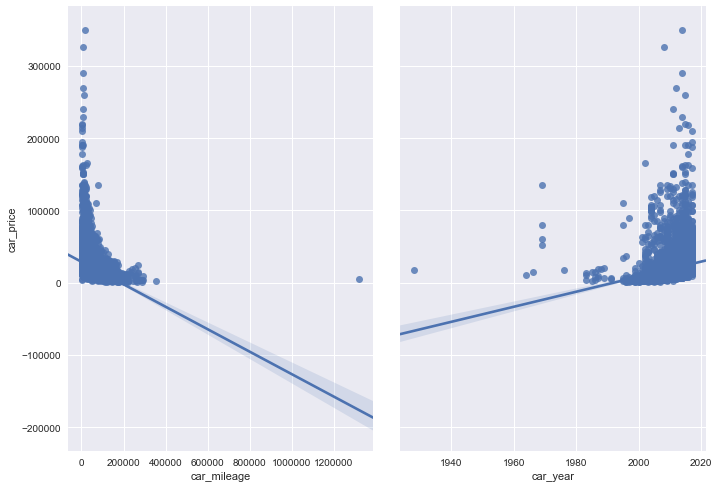

In [41]:
sns.pairplot(Data_Frame, x_vars=['car_mileage', 'car_year']\
             , y_vars = 'car_price', size = 7, aspect =0.7, kind = 'reg')

##  As we can see, the model does not fit the model at all. we can start now assuming that the linear model is not the good one for our data


In [30]:
import statsmodels.api as sm # import statsmodels 

target = pd.DataFrame(Data_Frame.car_price, columns=["car_price"])
X = Data_Frame["car_mileage"] ## X usually means our input variables (or independent variables)
y = target["car_price"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              car_price   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     3385.
Date:                Wed, 23 Aug 2017   Prob (F-statistic):               0.00
Time:                        23:28:41   Log-Likelihood:            -2.3265e+05
No. Observations:               21268   AIC:                         4.653e+05
Df Residuals:                   21266   BIC:                         4.653e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const        2.882e+04    149.627    192.626      0.000      2.85e+04  2.91e+04
car_mileage    -0.1556      0.003    -58.184      0.000        -0.161    -0.150
==============================================================================
Omnibus:                    24179.570   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4600921.848
Skew:                           5.682   Prob(JB):                         0.00
Kurtosis:                      74.153   Cond. No.                     8.96e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##  let’s try fitting a regression model with  one variable  

Remarqs about the table: 

* OLS stands for Ordinary Least Squares. 
* The method “Least Squares” means that we are fitting a regression line that would minimize the square of distance from the regression line. 
* 21268 is the number of observations. 
* Df residuals and models relates to the degrees of freedom — “the number of values in the final calculation of a statistic that are free to vary.”

* The coefficient of -0.1556 means that as car_price variable increases by 1, the predicted value of car_mileage increases by -0.1556. A few other important values are the R-squared — the percentage of variance our model explains; the standard error (is the standard deviation of the sampling distribution of a statistic, most commonly of the mean); the t scores and p-values, for hypothesis test — the RM has statistically significant p-value; there is a 95% confidence intervals for the RM (meaning we predict at a 95% percent confidence that the value of car_price is between -0.161 and -0.150).

###  Now let’s try fitting a regression model with more than one variable  ( Model fitting is the same)

In [31]:
X = Data_Frame[["car_mileage", "car_year"]]
y = target["car_price"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              car_price   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                 2.945e+04
Date:                Wed, 23 Aug 2017   Prob (F-statistic):               0.00
Time:                        23:28:50   Log-Likelihood:            -2.3265e+05
No. Observations:               21268   AIC:                         4.653e+05
Df Residuals:                   21266   BIC:                         4.653e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
car_mileage    -0.1546      0.003    -57.916      0.000        -0.160    -0.149
car_year       14.2959      0.074    192.608      0.000        14.150    14.441
==============================================================================
Omnibus:                    24185.077   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4602753.873
Skew:                           5.684   Prob(JB):                         0.00
Kurtosis:                      74.167   Cond. No.                         44.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###  Here, the model has a much higher R-squared value — 0.735 , meaning that this model explains about 74% of the variance in our dependent variable.  In fact cat_year and car_mileage are statistically significant in predicting (or estimating) the median car_price; not surprisingly , we see that as car_mileage decreases by 1, car_price  will increase by ... 

##  HYpothesis Testing and P-value

In [83]:
## Pvalue 

model.pvalues

car_mileage    0.0
car_year       0.0
dtype: float64

# Linear Regression in Scikit-Learn

We need to fit a linear regression model and predict the used car prices using 
the least squares method as the way to estimate the coefficients.

Y = target (car_price)
X = Predictive variables (car_year, car_mileage, car_transmission, car_make)

In [52]:
# Create a python list of  predective features names
feature_cols = ['car_mileage', 'car_year']

# use a list to select a subset of the original DataFrame
X = Data_Frame[feature_cols]

# We can do these two steppes in one line with the following code:
#      X = Data_Frame[['car_mileage', 'car_year']]

# print the first five rows
X.head()

,car_mileage,car_year
0,23036,2015
1,73619,2012
2,27784,2014
3,36636,2014
4,48568,2013


In [53]:
# check the type and shape of x
print (type(X))
print (X.shape)

<class 'pandas.core.frame.DataFrame'>
(21268, 2)


In [54]:
# now we select a serie Y from the data frame (Y is the target feature)
Y = Data_Frame['car_price']

## we could have done also Y= data_Frame.car_price

# print the first 5 rows
Y.head(5)

0    13298
1    26995
2    14097
3    27899
4    18981
Name: car_price, dtype: int64

In [55]:
# check the type and shape of Y
print (type(Y))
print (Y.shape)

<class 'pandas.core.series.Series'>
(21268,)


##  Splitting X and Y into training and testing sets

In [68]:
from sklearn.cross_validation import train_test_split
X_train, Y_train, X_test, Y_test = train_test_split(X, Y, random_state = 1)

In [69]:
# default split is 75% for training and 25% for testing
print (X_train.shape)
print (Y_train.shape)
print (X_test.shape)
print(Y_test.shape)

(15951, 2)
(5317, 2)
(15951,)
(5317,)


###      now that everything is set, we can  built the linear regression model 

In [73]:
# we import the model first

from sklearn.linear_model import LinearRegression

# im=ntantiate the model
linreg = LinearRegression()

# fit the model to the training data(Learn the coefficient)
linreg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

###  interpret model coefficients

In [76]:
# print the intercept and the coefficient

print('the Y intercept is :', linreg.intercept_)
print ('the coefficient  is :', linreg.coef_)

the Y intercept is : 272507.337387
the coefficient is : [  -0.16322229 -120.87354235]


### Pair our chosen features names with the coefficients

In [79]:
zip(linreg.coef_ ,linreg.coef_)

  Our linear regression model equation can be writting as such:

  Y =  - 0.163 (car_mileage)  - 120.87 (car_year)  + 272507

How to interpret these coefficients?


###  Conclusion:
